[sklearn.cluster.KMeans example](https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/kmean/kmean.ipynb)

[K-Means Clustering Concept](https://eunsukimme.github.io/ml/2019/12/16/K-Means)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation

In [2]:
data_n = 20
data = np.random.randint(0, 10, size=(data_n, 2))
df = pd.DataFrame(data, columns=['x', 'y'])
data_x = df.values[:, 0]
data_y = df.values[:, 1]
centroids_n = 3

In [3]:
df.head(5)

,x,y
0,9,9
1,6,9
2,5,2
3,3,4
4,7,8


<AxesSubplot:xlabel='x', ylabel='y'>

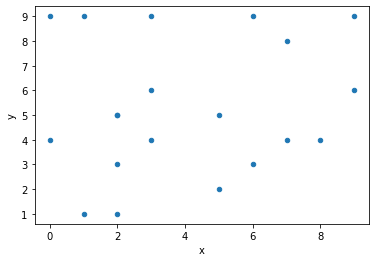

In [4]:
df.plot.scatter(x='x', y='y', colormap='viridis')

# sklearn

In [5]:
kmeans = KMeans(n_clusters=centroids_n).fit(df.values)
df['cluster'] = kmeans.labels_

In [6]:
df.head(5)

,x,y,cluster
0,9,9,0
1,6,9,0
2,5,2,1
3,3,4,1
4,7,8,0


/home/zeros/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='x', ylabel='y'>

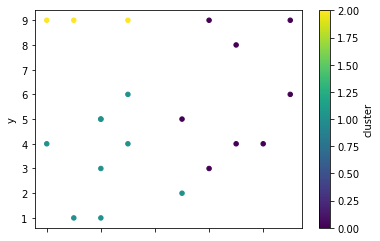

In [7]:
df.plot.scatter(x='x', y='y', c='cluster', colormap='viridis')

In [8]:
kmeans.cluster_centers_

array([[7.125     , 6.        ],
       [2.22222222, 3.44444444],
       [1.33333333, 9.        ]])

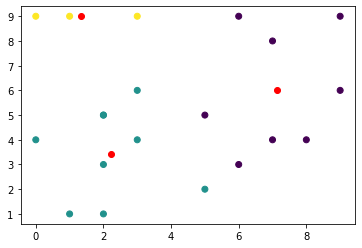

In [9]:
plt.scatter(data_x, data_y, c=df['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')

# Implement

## STEP01: Place k random centroids

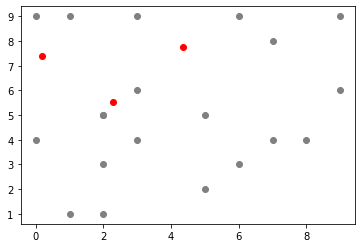

In [10]:
def randomize():
    centroids_x = np.random.uniform(min(data_x), max(data_x), centroids_n)
    centroids_y = np.random.uniform(min(data_y), max(data_y), centroids_n)
    return centroids_x, centroids_y

centroids_x, centroids_y = randomize()
plt.scatter(data_x, data_y, c="gray")
plt.scatter(centroids_x, centroids_y, c="red")

## STEP02: Assign datas to nearest centroids

In [11]:
def distance(x, y, u, v):
    return ((x - u)**2 + (y - v)**2)**0.5

centroids  :  [0 0 2 2 0 2 0 2 2 1 2 1 0 2 2 2 2 0 2 0]
centroids_x:  [4.35474685 0.19490382 2.28447287]
centroids_y:  [7.73954685 7.38290366 5.52470779]


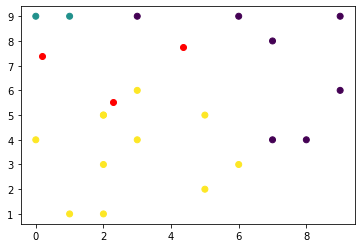

In [12]:
def nearest(centroids_x, centroids_y):
    centroids = np.zeros(data_n, dtype=int)
    for d in range(data_n):
        distances = np.zeros(centroids_n)
        for c in range(centroids_n):
            distances[c] = distance(data_x[d], data_y[d], centroids_x[c], centroids_y[c])
        centroids[d] = np.argmin(distances)
    return centroids
    
centroids = nearest(centroids_x, centroids_y)
print("centroids  : ", centroids)
print("centroids_x: ", centroids_x)
print("centroids_y: ", centroids_y)
plt.scatter(data_x, data_y, c=centroids)
plt.scatter(centroids_x, centroids_y, c="red")

## STEP03: Update centroids

    means_x:  [7.         0.5        2.81818182]
    means_y:  [7.         9.         3.54545455]


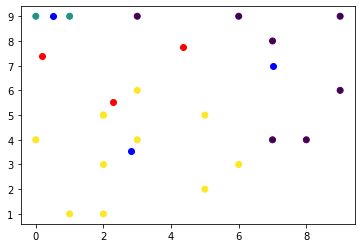

In [16]:
def update():
    means_x = np.zeros(centroids_n)
    means_y = np.zeros(centroids_n)
    counts = np.zeros(centroids_n)
    
    for i in range(data_n):
        c = centroids[i]
        means_x[c] = means_x[c] + data_x[i]
        means_y[c] = means_y[c] + data_y[i]
        counts[c] = counts[c] + 1
    
    for c in range(centroids_n):
        means_x[c] = means_x[c] / counts[c];
        means_y[c] = means_y[c] / counts[c];
        
    return means_x, means_y

def chart(before=False):
    print("    means_x: ", means_x)
    print("    means_y: ", means_y)
    plt.scatter(data_x, data_y, c=centroids)
    
    if before:
        plt.scatter(centroids_x, centroids_y, c="red")
    plt.scatter(means_x, means_y, c="blue")
    
means_x, means_y = update()
chart(before=True)

    means_x:  [7.         0.5        2.81818182]
    means_y:  [7.         9.         3.54545455]


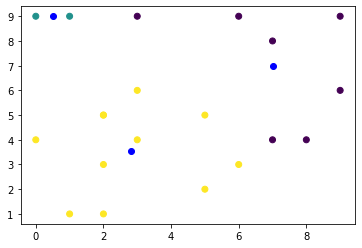

In [19]:
def cluster():
    for i in range(1000):
        centroids_x, centroids_y = randomize()
        centroids = nearest(centroids_x, centroids_y)
        means_x, means_y = update()
    
        if np.allclose(centroids_y, means_y):
            break

cluster()
chart()